## Практическое задание

<ol>
    <li>Попробуйте изменить параметры нейронной сети работающей с датасетом imdb либо нейронной сети работающей airline-passengers(она прилагается вместе с датасетом к уроку в виде отдельного скрипта) так, чтобы улучшить ее точность. Приложите анализ.</li>
    <li>Попробуйте изменить параметры нейронной сети генерирующий текст таким образом, чтобы добиться генерации как можно более осмысленного текста. Пришлите лучший получившейся у вас текст и опишите, что вы предприняли, чтобы его получить. Можно использовать текст другого прозведения.</li>
    <li>* Попробуйте на numpy реализовать нейронную сеть архитектуры LSTM</li>
    <li>* Предложите свои варианты решения проблемы исчезающего градиента в RNN</li>
</ol>

In [26]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense , Activation
from keras.layers import LSTM , GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

#### Предсказание данных airline-passengers

In [54]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

numpy.random.seed(42)

dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))


batch_size = 4
model = Sequential()

model.add(LSTM(8, batch_input_shape=(batch_size, look_back, 1), stateful=True))
# model.add(Dense(4))
# model.add(Activation('relu'))

# model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

for i in range(100):
	model.fit(trainX, trainY, epochs=5, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()

trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])





Epoch 1/5
 - 0s - loss: 0.0184
Epoch 2/5
 - 0s - loss: 0.0076
Epoch 3/5
 - 0s - loss: 0.0113
Epoch 4/5
 - 0s - loss: 0.0099
Epoch 5/5
 - 0s - loss: 0.0091
Epoch 1/5
 - 0s - loss: 0.0042
Epoch 2/5
 - 0s - loss: 0.0103
Epoch 3/5
 - 0s - loss: 0.0082
Epoch 4/5
 - 0s - loss: 0.0080
Epoch 5/5
 - 0s - loss: 0.0079
Epoch 1/5
 - 0s - loss: 0.0034
Epoch 2/5
 - 0s - loss: 0.0090
Epoch 3/5
 - 0s - loss: 0.0071
Epoch 4/5
 - 0s - loss: 0.0071
Epoch 5/5
 - 0s - loss: 0.0070
Epoch 1/5
 - 0s - loss: 0.0033
Epoch 2/5
 - 0s - loss: 0.0079
Epoch 3/5
 - 0s - loss: 0.0063
Epoch 4/5
 - 0s - loss: 0.0064
Epoch 5/5
 - 0s - loss: 0.0062
Epoch 1/5
 - 0s - loss: 0.0032
Epoch 2/5
 - 0s - loss: 0.0068
Epoch 3/5
 - 0s - loss: 0.0056
Epoch 4/5
 - 0s - loss: 0.0057
Epoch 5/5
 - 0s - loss: 0.0055
Epoch 1/5
 - 0s - loss: 0.0032
Epoch 2/5
 - 0s - loss: 0.0059
Epoch 3/5
 - 0s - loss: 0.0051
Epoch 4/5
 - 0s - loss: 0.0051
Epoch 5/5
 - 0s - loss: 0.0050
Epoch 1/5
 - 0s - loss: 0.0033
Epoch 2/5
 - 0s - loss: 0.0052
Epoch 3/

 - 0s - loss: 0.0018
Epoch 1/5
 - 0s - loss: 0.0018
Epoch 2/5
 - 0s - loss: 0.0017
Epoch 3/5
 - 0s - loss: 0.0018
Epoch 4/5
 - 0s - loss: 0.0017
Epoch 5/5
 - 0s - loss: 0.0017
Epoch 1/5
 - 0s - loss: 0.0017
Epoch 2/5
 - 0s - loss: 0.0017
Epoch 3/5
 - 0s - loss: 0.0018
Epoch 4/5
 - 0s - loss: 0.0017
Epoch 5/5
 - 0s - loss: 0.0017
Epoch 1/5
 - 0s - loss: 0.0017
Epoch 2/5
 - 0s - loss: 0.0017
Epoch 3/5
 - 0s - loss: 0.0018
Epoch 4/5
 - 0s - loss: 0.0017
Epoch 5/5
 - 0s - loss: 0.0017
Epoch 1/5
 - 0s - loss: 0.0017
Epoch 2/5
 - 0s - loss: 0.0017
Epoch 3/5
 - 0s - loss: 0.0017
Epoch 4/5
 - 0s - loss: 0.0017
Epoch 5/5
 - 0s - loss: 0.0017
Epoch 1/5
 - 0s - loss: 0.0017
Epoch 2/5
 - 0s - loss: 0.0017
Epoch 3/5
 - 0s - loss: 0.0017
Epoch 4/5
 - 0s - loss: 0.0017
Epoch 5/5
 - 0s - loss: 0.0017
Epoch 1/5
 - 0s - loss: 0.0017
Epoch 2/5
 - 0s - loss: 0.0016
Epoch 3/5
 - 0s - loss: 0.0017
Epoch 4/5
 - 0s - loss: 0.0017
Epoch 5/5
 - 0s - loss: 0.0016
Epoch 1/5
 - 0s - loss: 0.0016
Epoch 2/5
 - 0s - 

Train Score: 19.99 RMSE
Test Score: 95.65 RMSE


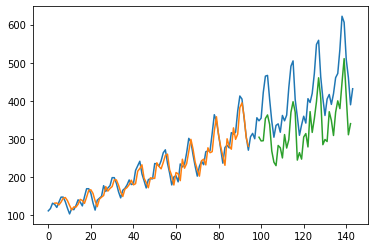

In [17]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


Train Score: 17.33 RMSE
Test Score: 117.96 RMSE


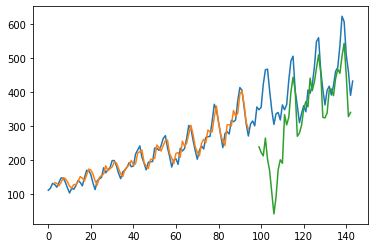

In [55]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


#### Выводы
* Увеличил batch до 4 - блок для анализа стал больше
* Увеличил кол-во блоков lstm до 16 -  повысил сложность сети
* Увеличил кол-во эпох до 3. 9 эпох переобучило модель.
* Добавление слоя Dense ухудшило результат. 

На втором графике видно сильное расхождение в начале, однако показатели выше.

Рефренсные показатели модели с урока:
Train Score: 20.57 RMSE
Test Score: 52.74 RMSE

In [58]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000

In [57]:


# обрезание текстов после данного количества слов (среди top max_features наиболее используемые слова)
maxlen = 80
batch_size = 50 # увеличьте значение для ускорения обучения

print('Загрузка данных...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'тренировочные последовательности')
print(len(x_test), 'тестовые последовательности')

print('Pad последовательности (примеров в x единицу времени)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Построение модели...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# стоит попробовать использовать другие оптимайзер и другие конфигурации оптимайзеров 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Процесс обучения...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=1, # увеличьте при необходимости
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Результат при тестировании:', score)
print('Тестовая точность:', acc)



Загрузка данных...
17465344/17464789 [==============================] - 14s 1us/step
25000 тренировочные последовательности
25000 тестовые последовательности
Pad последовательности (примеров в x единицу времени)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Построение модели...
Процесс обучения...


/Users/daniilstv/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/1
25000/25000 [==============================] - 15s 614us/step
Результат при тестировании: 0.3870956195294857
Тестовая точность: 0.8306800127029419


#### Предсказание на датасете imdb

In [66]:

max_features = 20000

# обрезание текстов после данного количества слов (среди top max_features наиболее используемые слова)
maxlen = 160
batch_size = 30 # увеличьте значение для ускорения обучения

print('Загрузка данных...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'тренировочные последовательности')
print(len(x_test), 'тестовые последовательности')

print('Pad последовательности (примеров в x единицу времени)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Построение модели...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(256, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# стоит попробовать использовать другие оптимайзер и другие конфигурации оптимайзеров 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Процесс обучения...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3, # увеличьте при необходимости
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Результат при тестировании:', score)
print('Тестовая точность:', acc)



Загрузка данных...
25000 тренировочные последовательности
25000 тестовые последовательности
Pad последовательности (примеров в x единицу времени)
x_train shape: (25000, 160)
x_test shape: (25000, 160)
Построение модели...
Процесс обучения...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 381s 15ms/step - loss: 0.4926 - accuracy: 0.7638 - val_loss: 0.3877 - val_accuracy: 0.8327
Epoch 2/3
25000/25000 [==============================] - 363s 15ms/step - loss: 0.4415 - accuracy: 0.7960 - val_loss: 0.3619 - val_accuracy: 0.8421
Epoch 3/3
25000/25000 [==============================] - 94s 4ms/step
Результат при тестировании: 0.32176474358439444
Тестовая точность: 0.8628399968147278


Рефренсные показатели модели с урока:
Результат при тестировании: 0.3870956195294857
Тестовая точность: 0.8306800127029419

#### Выводы:
* maxlen удвоил - 160: для увеличения последовательности слов
* batch_size сократил до 30: это увиличивает кол-во блоков
* LSTM удвоил - 256: повысил сложеность сети
* Увеличил количество эпох до 3: для дообучения

Качество увиличилось, но не радикально


Попробуйте изменить параметры нейронной сети генерирующий текст таким образом, чтобы добиться генерации как можно более осмысленного текста. Пришлите лучший получившейся у вас текст и опишите, что вы предприняли, чтобы его получить. Можно использовать текст другого прозведения.

In [75]:
import numpy as np
from keras.layers import Dense, Activation
from keras.layers.recurrent import SimpleRNN, LSTM, GRU
from keras.models import Sequential

import os
import time




In [76]:
# построчное чтение из примера с текстом 
with open("Watts Peter. Blindsight.txt", 'rb') as _in:
    lines = []
    for line in _in:
        line = line.strip().lower().decode("ascii", "ignore")
        if len(line) == 0:
            continue
        lines.append(line)
text = " ".join(lines)
chars = set([c for c in text])
nb_chars = len(chars)



In [85]:

# создание индекса символов и reverse mapping чтобы передвигаться между значениями numerical
# ID and a specific character. The numerical ID will correspond to a column
# ID и определенный символ. Numerical ID будет соответсвовать колонке
# число при использовании one-hot кодировки для представление входов символов
char2index = {c: i for i, c in enumerate(chars)}
index2char = {i: c for i, c in enumerate(chars)}

# для удобства выберете фиксированную длину последовательность 10 символов 
SEQLEN, STEP = 10, 1
input_chars, label_chars = [], []

# конвертация data в серии разных SEQLEN-length субпоследовательностей
for i in range(0, len(text) - SEQLEN, STEP):
    input_chars.append(text[i: i + SEQLEN])
    label_chars.append(text[i + SEQLEN])


# Вычисление one-hot encoding входных последовательностей X и следующего символа (the label) y

X = np.zeros((len(input_chars), SEQLEN, nb_chars), dtype=np.bool)
y = np.zeros((len(input_chars), nb_chars), dtype=np.bool)
for i, input_char in enumerate(input_chars):
    for j, ch in enumerate(input_char):
        X[i, j, char2index[ch]] = 1
    y[i, char2index[label_chars[i]]] = 1

In [86]:
# установка ряда метапамертров  для нейронной сети и процесса тренировки
BATCH_SIZE, HIDDEN_SIZE = 128, 256
NUM_ITERATIONS = 3 # 25 должно быть достаточно
NUM_EPOCHS_PER_ITERATION = 5
NUM_PREDS_PER_EPOCH = 60



In [87]:
# Create a super simple recurrent neural network. There is one recurrent
# layer that produces an embedding of size HIDDEN_SIZE from the one-hot
# encoded input layer. This is followed by a Dense fully-connected layer
# across the set of possible next characters, which is converted to a
# probability score via a standard softmax activation with a multi-class
# cross-entropy loss function linking the prediction to the one-hot
# encoding character label.

'''
Создание очень простой рекуррентной нейронной сети. В ней будет один реккурентный закодированный входной слой. За ним последует полносвязный слой связанный с набором возможных следующих символов, которые конвертированы в вероятностные результаты через стандартную softmax активацию с multi-class cross-encoding loss функцию ссылающуются на предсказание one-hot encoding лейбл символа
'''

model = Sequential()
model.add(
    LSTM(  # вы можете изменить эту часть на LSTM или SimpleRNN, чтобы попробовать альтернативы
            HIDDEN_SIZE,
        return_sequences=False,
        input_shape=(SEQLEN, nb_chars),
        unroll=True,
        dropout=0.2,
        recurrent_dropout=0.2
    )
)
model.add(Dense(nb_chars))
model.add(Activation("softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam")


In [88]:
start_time = time.clock()

# выполнение серий тренировочных и демонстрационных итераций 
for iteration in range(NUM_ITERATIONS):

    # для каждой итерации запуск передачи данных в модель 
    print("=" * 50)
    print("Итерация #: %d" % (iteration))
    model.fit(X, y, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS_PER_ITERATION)

    # Select a random example input sequence.
    test_idx = np.random.randint(len(input_chars))
    test_chars = input_chars[test_idx]

    # для числа шагов предсказаний использование текущей тренируемой модели 
    # конструирование one-hot encoding для тестирования input и добавление предсказания.
    print("Генерация из посева: %s" % (test_chars))
    print(test_chars, end="")
    for i in range(NUM_PREDS_PER_EPOCH):

        # здесь one-hot encoding.
        X_test = np.zeros((1, SEQLEN, nb_chars))
        for j, ch in enumerate(test_chars):
            X_test[0, j, char2index[ch]] = 1

        # осуществление предсказания с помощью текущей модели.
        pred = model.predict(X_test, verbose=0)[0]
        y_pred = index2char[np.argmax(pred)]

        # вывод предсказания добавленного к тестовому примеру 
        print(y_pred, end="")

        # инкрементация тестового примера содержащего предсказание
        test_chars = test_chars[1:] + y_pred

print()
print ("Время выполнения {:g} минут".format((time.clock() - start_time)/60))


/Users/daniilstv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


Итерация #: 0
Epoch 1/5
612346/612346 [==============================] - 263s 429us/step - loss: 2.3746
Epoch 2/5
612346/612346 [==============================] - 264s 431us/step - loss: 2.0731
Epoch 3/5
612346/612346 [==============================] - 284s 464us/step - loss: 1.9699
Epoch 4/5
612346/612346 [==============================] - 283s 462us/step - loss: 1.9140
Epoch 5/5
612346/612346 [==============================] - 293s 479us/step - loss: 1.8769
Генерация из посева: id, "becau
id, "because the sent of the surface the surface the surface the surfa==================================================
Итерация #: 1
Epoch 1/5
612346/612346 [==============================] - 310s 505us/step - loss: 1.8509
Epoch 2/5
612346/612346 [==============================] - 259s 423us/step - loss: 1.8317
Epoch 3/5
612346/612346 [==============================] - 282s 460us/step - loss: 1.8161
Epoch 4/5
612346/612346 [==============================] - 251s 410us/step - loss: 1.8044
Epoch 5/5

/Users/daniilstv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


#### Вывод
Увеличение  BATCH_SIZE не влияет положительно.
HIDDEN_SIZE должно увеличить глубину последовательности
Зачем обучать в каждую итерацию? Разве нельзя подставлять разное зерно однажды обученной модели?
Сократил предсказание до 60 символов.
Положительно повлияно увеличение эпох.

В итоге получил +- осмысленный текст.